In [5]:
#Q2

In [7]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
import 
alg = np.linalg

In [8]:
N = 1000

In [9]:
def gen_samples(size,mu_1,mu_2,sig1,sig2):
    data = (np.random.multivariate_normal(mu_1,sig1,size), np.random.multivariate_normal(mu_2, sig2, size))
    labels = (np.full((size,),1),np.full((size,),-1))
    return np.concatenate(data),np.concatenate(labels)

In [10]:
mu_1 = [1,1]
mu_2 = [-1,-1]

x_t, y_t = gen_samples(N,mu_1,mu_2,[[1,0],[0,1]],[[3,0],[0,3]])
x,y = gen_samples(N,[1,1],[-1,-1],[[1,0],[0,1]],[[3,0],[0,3]])

In [270]:
#function to handle the plotting and calculations
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
def svc_format(C,gamma):
    plt_min, plt_max = -5, 5
    y_min,y_max = -5,5
    x_min,x_max = -5,5
    clf = svm.SVC(kernel='rbf',C = C, gamma = gamma)
    clf.fit(x_t,y_t)
    y_pred = clf.predict(x)
    #now plot the graph
#     XX, YY = np.mgrid[plt_min:plt_max:200j, y_min:y_max:200j]
#     Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
#     Z = Z.reshape(XX.shape)
#     # Clear figure
#     plt.clf()
#     fig = plt.figure(figsize=(4, 4))
#     plt.title('C = {}, gamma = {}'.format(C,gamma))
#     # Graph the samples after running through the decision function
#     plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
#     plt.contour(XX, YY, Z, colors='k', linestyles=['--', '-', '--'],
#               levels=[-.5, 0, .5])

#     plt.xlim(x_min, x_max)
#     plt.ylim(y_min, y_max)

#     plt.xticks(())
#     plt.yticks(())
#     fig.savefig(fname='./1a_{}_{}.jpg'.format(C,gamma))
#     plt.show()

    plt.scatter(x[:, 0], x[:, 1], c=y_pred, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    fig = plt.figure(figsize=(4, 4))
    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    fig.savefig(fname='./1a_{}_{}.jpg'.format(C,gamma))
    plt.show()

    print('Support vectors found for 1: {}'.format(clf.n_support_[0]))
    print('Support vectors found for -1: {}'.format(clf.n_support_[1]))

    predictions = clf.predict(x_t)
    print(confusion_matrix(y_t, y_pred))
    print(classification_report(y_t, y_pred))

In [271]:
#PART A

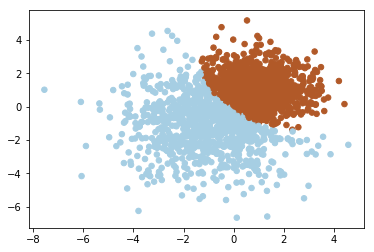

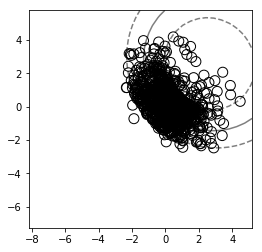

Support vectors found for 1: 401
Support vectors found for -1: 402
[[800 200]
 [ 64 936]]
              precision    recall  f1-score   support

          -1       0.93      0.80      0.86      1000
           1       0.82      0.94      0.88      1000

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



In [272]:
#gamma = 0.01
svc_format(1,0.01)

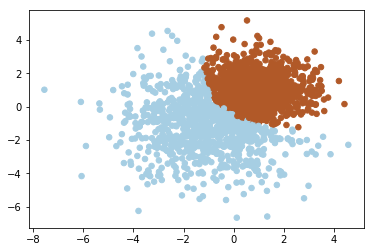

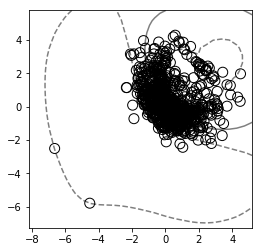

Support vectors found for 1: 341
Support vectors found for -1: 342
[[786 214]
 [ 55 945]]
              precision    recall  f1-score   support

          -1       0.93      0.79      0.85      1000
           1       0.82      0.94      0.88      1000

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.86      2000
weighted avg       0.87      0.87      0.86      2000



In [279]:
#gamma = 0.1
svc_format(1,0.1)

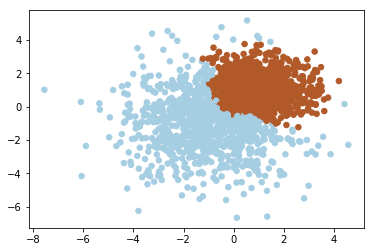

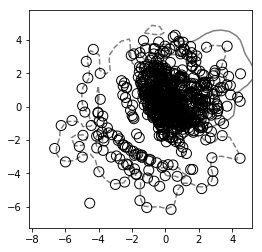

Support vectors found for 1: 409
Support vectors found for -1: 347
[[807 193]
 [ 74 926]]
              precision    recall  f1-score   support

          -1       0.92      0.81      0.86      1000
           1       0.83      0.93      0.87      1000

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



In [280]:
#gamma = 1
svc_format(1,1)

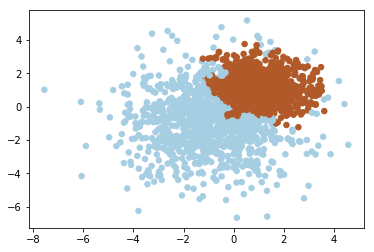

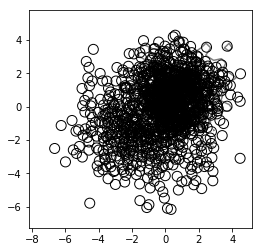

Support vectors found for 1: 691
Support vectors found for -1: 552
[[824 176]
 [104 896]]
              precision    recall  f1-score   support

          -1       0.89      0.82      0.85      1000
           1       0.84      0.90      0.86      1000

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000



In [281]:
#gamma = 10
svc_format(1,10)

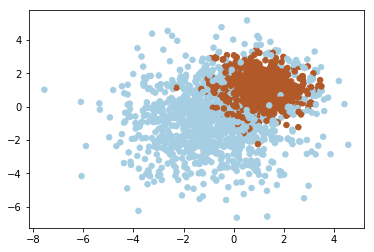

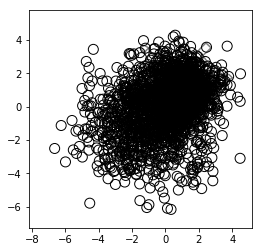

Support vectors found for 1: 938
Support vectors found for -1: 838
[[831 169]
 [200 800]]
              precision    recall  f1-score   support

          -1       0.81      0.83      0.82      1000
           1       0.83      0.80      0.81      1000

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000



In [282]:
#gamma = 100
svc_format(1,100)

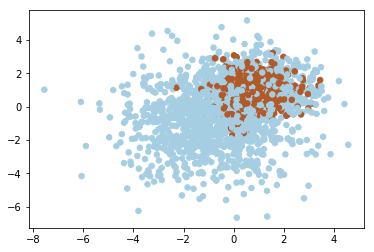

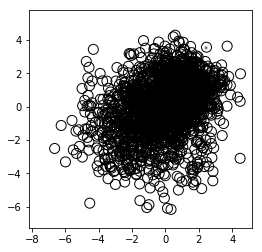

Support vectors found for 1: 999
Support vectors found for -1: 988
[[901  99]
 [569 431]]
              precision    recall  f1-score   support

          -1       0.61      0.90      0.73      1000
           1       0.81      0.43      0.56      1000

    accuracy                           0.67      2000
   macro avg       0.71      0.67      0.65      2000
weighted avg       0.71      0.67      0.65      2000



In [283]:
#gamma = 1000
svc_format(1,1000)

In [284]:
#PART B

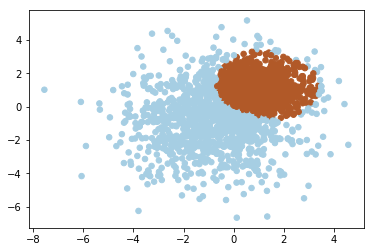

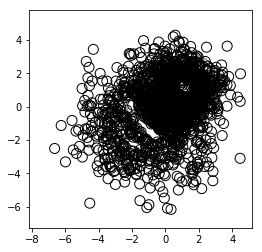

Support vectors found for 1: 840
Support vectors found for -1: 836
[[854 146]
 [159 841]]
              precision    recall  f1-score   support

          -1       0.84      0.85      0.85      1000
           1       0.85      0.84      0.85      1000

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



In [285]:
#C = 0.01
svc_format(0.01,1)

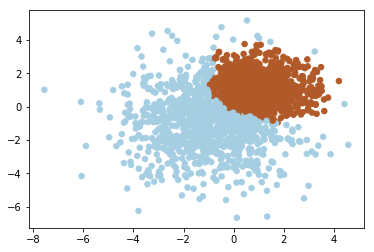

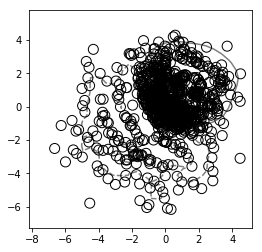

Support vectors found for 1: 471
Support vectors found for -1: 424
[[821 179]
 [ 85 915]]
              precision    recall  f1-score   support

          -1       0.91      0.82      0.86      1000
           1       0.84      0.92      0.87      1000

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



In [286]:
#C = 0.1
svc_format(0.1,1)

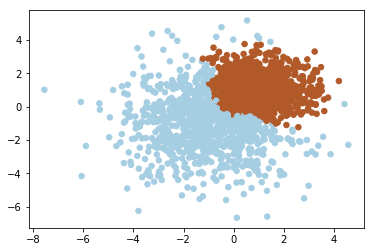

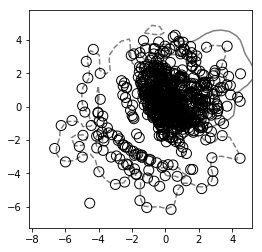

Support vectors found for 1: 409
Support vectors found for -1: 347
[[807 193]
 [ 74 926]]
              precision    recall  f1-score   support

          -1       0.92      0.81      0.86      1000
           1       0.83      0.93      0.87      1000

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



In [287]:
#C = 1
svc_format(1,1)

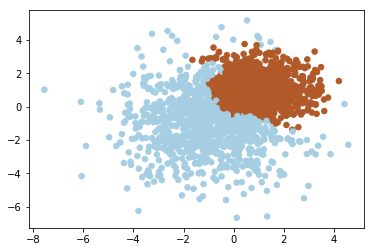

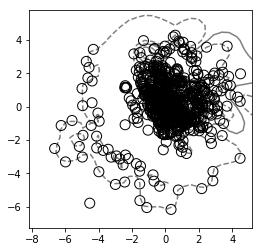

Support vectors found for 1: 359
Support vectors found for -1: 332
[[807 193]
 [ 76 924]]
              precision    recall  f1-score   support

          -1       0.91      0.81      0.86      1000
           1       0.83      0.92      0.87      1000

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



In [288]:
#C = 10
svc_format(10,1)

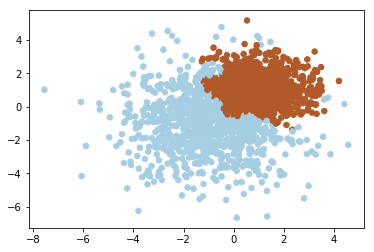

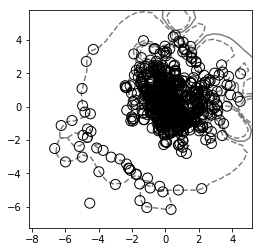

Support vectors found for 1: 361
Support vectors found for -1: 325
[[807 193]
 [ 75 925]]
              precision    recall  f1-score   support

          -1       0.91      0.81      0.86      1000
           1       0.83      0.93      0.87      1000

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



In [289]:
#C = 100
svc_format(100,1)

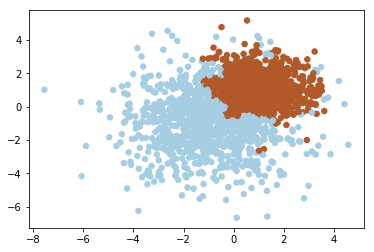

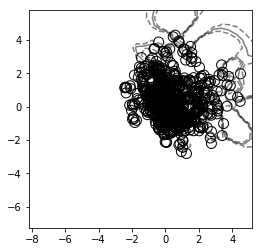

Support vectors found for 1: 314
Support vectors found for -1: 324
[[815 185]
 [ 88 912]]
              precision    recall  f1-score   support

          -1       0.90      0.81      0.86      1000
           1       0.83      0.91      0.87      1000

    accuracy                           0.86      2000
   macro avg       0.87      0.86      0.86      2000
weighted avg       0.87      0.86      0.86      2000



In [290]:
#C = 1000
svc_format(1000,1)

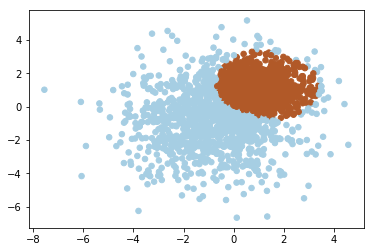

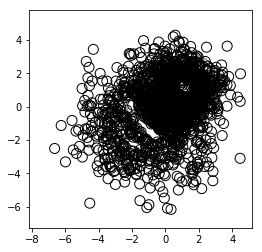

Support vectors found for 1: 840
Support vectors found for -1: 836
[[854 146]
 [159 841]]
              precision    recall  f1-score   support

          -1       0.84      0.85      0.85      1000
           1       0.85      0.84      0.85      1000

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



In [291]:
#C = 0.01
svc_format(0.01,1)

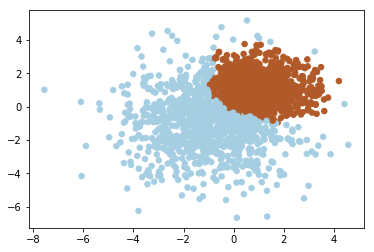

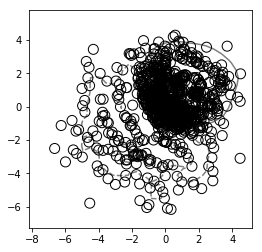

Support vectors found for 1: 471
Support vectors found for -1: 424
[[821 179]
 [ 85 915]]
              precision    recall  f1-score   support

          -1       0.91      0.82      0.86      1000
           1       0.84      0.92      0.87      1000

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



In [292]:
#C = 0.1
svc_format(0.1,1)

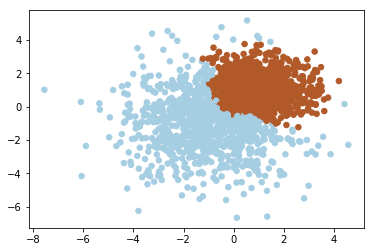

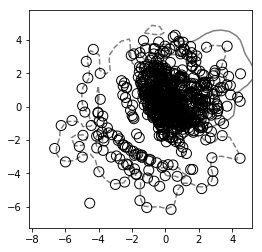

Support vectors found for 1: 409
Support vectors found for -1: 347
[[807 193]
 [ 74 926]]
              precision    recall  f1-score   support

          -1       0.92      0.81      0.86      1000
           1       0.83      0.93      0.87      1000

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



In [293]:
#C = 1
svc_format(1,1)

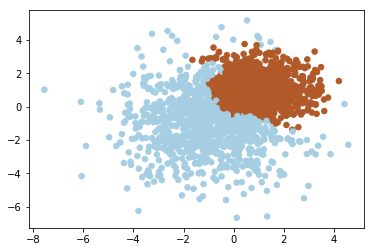

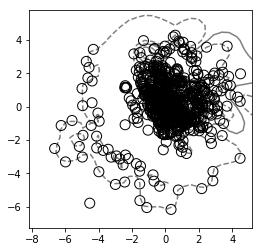

Support vectors found for 1: 359
Support vectors found for -1: 332
[[807 193]
 [ 76 924]]
              precision    recall  f1-score   support

          -1       0.91      0.81      0.86      1000
           1       0.83      0.92      0.87      1000

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



In [294]:
#C = 10
svc_format(10,1)

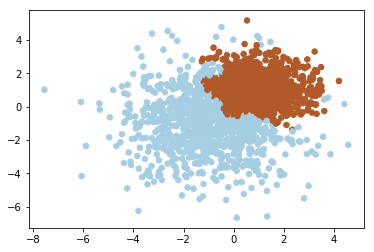

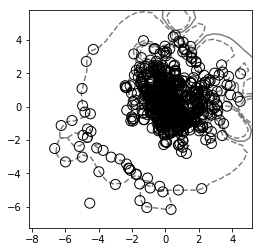

Support vectors found for 1: 361
Support vectors found for -1: 325
[[807 193]
 [ 75 925]]
              precision    recall  f1-score   support

          -1       0.91      0.81      0.86      1000
           1       0.83      0.93      0.87      1000

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



In [295]:
#C = 100
svc_format(100,1)

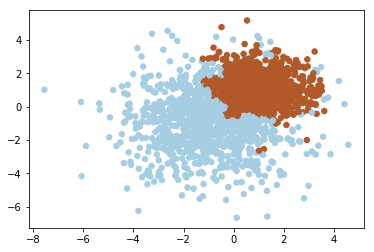

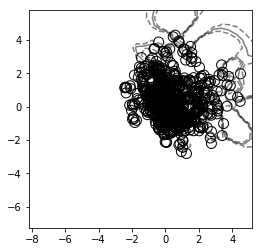

Support vectors found for 1: 314
Support vectors found for -1: 324
[[815 185]
 [ 88 912]]
              precision    recall  f1-score   support

          -1       0.90      0.81      0.86      1000
           1       0.83      0.91      0.87      1000

    accuracy                           0.86      2000
   macro avg       0.87      0.86      0.86      2000
weighted avg       0.87      0.86      0.86      2000



In [296]:
#C = 1000
svc_format(1000,1)

In [297]:
#linear kernel instead
#function to handle the plotting and calculations
def svc_format_linear(C,gamma):
    plt_min, plt_max = -5, 5
    y_min,y_max = -5,5
    x_min,x_max = -5,5
    clf = svm.SVC(kernel='linear',C = C, gamma = gamma)
    clf.fit(x_t,y_t)
    y_pred = clf.predict(x)
    #now plot the graph
#     XX, YY = np.mgrid[plt_min:plt_max:200j, y_min:y_max:200j]
#     Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
#     Z = Z.reshape(XX.shape)
#     # Clear figure
#     plt.clf()
#     fig = plt.figure(figsize=(4, 4))
#     plt.title('Gamma = {}'.format(gamma))
#     # Graph the samples after running through the decision function
#     plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
#     plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
#               levels=[-.5, 0, .5])

#     plt.xlim(x_min, x_max)
#     plt.ylim(y_min, y_max)

#     plt.xticks(())
#     plt.yticks(())
#     fig.savefig(fname='./1a_{}_{}_linear.jpg'.format(C,gamma))
#     plt.show()
    plt.scatter(x[:, 0], x[:, 1], c=y_pred, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    fig = plt.figure(figsize=(4, 4))
    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    fig.savefig(fname='./1a_{}_{}_linear.jpg'.format(C,gamma))
    plt.show()

    print('Support vectors found for 1: {}'.format(clf.n_support_[0]))
    print('Support vectors found for -1: {}'.format(clf.n_support_[1]))

    predictions = clf.predict(x_t)
    print(confusion_matrix(y_t, y_pred))
    print(classification_report(y_t, y_pred))

    print('Support vectors found for 1: {}'.format(clf.n_support_[0]))
    print('Support vectors found for -1: {}'.format(clf.n_support_[1]))

    predictions = clf.predict(x_t)
    print(confusion_matrix(y_t, y_pred))
    print(classification_report(y_t, y_pred))

In [298]:
#PART C

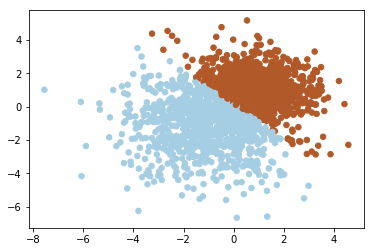

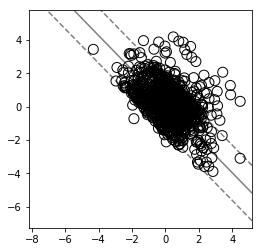

Support vectors found for 1: 433
Support vectors found for -1: 433
[[790 210]
 [ 88 912]]
              precision    recall  f1-score   support

          -1       0.90      0.79      0.84      1000
           1       0.81      0.91      0.86      1000

    accuracy                           0.85      2000
   macro avg       0.86      0.85      0.85      2000
weighted avg       0.86      0.85      0.85      2000

Support vectors found for 1: 433
Support vectors found for -1: 433
[[790 210]
 [ 88 912]]
              precision    recall  f1-score   support

          -1       0.90      0.79      0.84      1000
           1       0.81      0.91      0.86      1000

    accuracy                           0.85      2000
   macro avg       0.86      0.85      0.85      2000
weighted avg       0.86      0.85      0.85      2000



In [299]:
#C = 0.01
svc_format_linear(0.01,1)

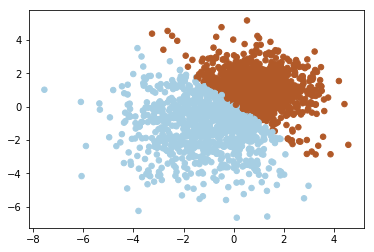

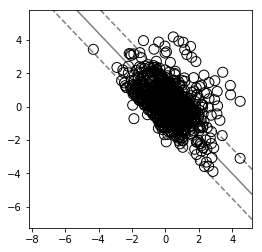

Support vectors found for 1: 398
Support vectors found for -1: 398
[[793 207]
 [ 90 910]]
              precision    recall  f1-score   support

          -1       0.90      0.79      0.84      1000
           1       0.81      0.91      0.86      1000

    accuracy                           0.85      2000
   macro avg       0.86      0.85      0.85      2000
weighted avg       0.86      0.85      0.85      2000

Support vectors found for 1: 398
Support vectors found for -1: 398
[[793 207]
 [ 90 910]]
              precision    recall  f1-score   support

          -1       0.90      0.79      0.84      1000
           1       0.81      0.91      0.86      1000

    accuracy                           0.85      2000
   macro avg       0.86      0.85      0.85      2000
weighted avg       0.86      0.85      0.85      2000



In [300]:
#C = 0.1
svc_format_linear(0.1,1)

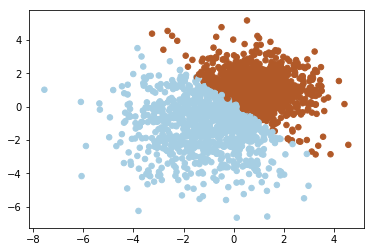

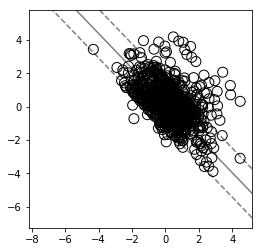

Support vectors found for 1: 393
Support vectors found for -1: 393
[[799 201]
 [ 91 909]]
              precision    recall  f1-score   support

          -1       0.90      0.80      0.85      1000
           1       0.82      0.91      0.86      1000

    accuracy                           0.85      2000
   macro avg       0.86      0.85      0.85      2000
weighted avg       0.86      0.85      0.85      2000

Support vectors found for 1: 393
Support vectors found for -1: 393
[[799 201]
 [ 91 909]]
              precision    recall  f1-score   support

          -1       0.90      0.80      0.85      1000
           1       0.82      0.91      0.86      1000

    accuracy                           0.85      2000
   macro avg       0.86      0.85      0.85      2000
weighted avg       0.86      0.85      0.85      2000



In [301]:
#C = 1
svc_format_linear(1,1)

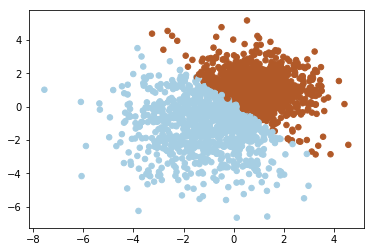

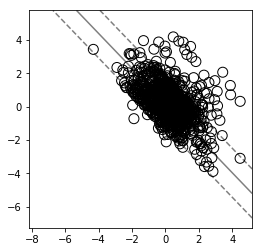

Support vectors found for 1: 393
Support vectors found for -1: 393
[[799 201]
 [ 91 909]]
              precision    recall  f1-score   support

          -1       0.90      0.80      0.85      1000
           1       0.82      0.91      0.86      1000

    accuracy                           0.85      2000
   macro avg       0.86      0.85      0.85      2000
weighted avg       0.86      0.85      0.85      2000

Support vectors found for 1: 393
Support vectors found for -1: 393
[[799 201]
 [ 91 909]]
              precision    recall  f1-score   support

          -1       0.90      0.80      0.85      1000
           1       0.82      0.91      0.86      1000

    accuracy                           0.85      2000
   macro avg       0.86      0.85      0.85      2000
weighted avg       0.86      0.85      0.85      2000



In [302]:
#C = 10
svc_format_linear(10,1)

In [ ]:
#C = 100
svc_format_linear(100,1)

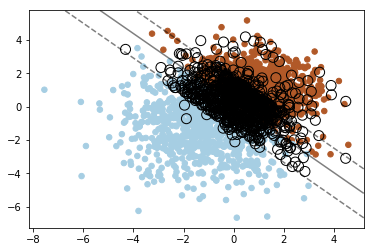

<Figure size 288x288 with 0 Axes>

Support vectors found for 1: 393
Support vectors found for -1: 393
[[799 201]
 [ 91 909]]
              precision    recall  f1-score   support

          -1       0.90      0.80      0.85      1000
           1       0.82      0.91      0.86      1000

    accuracy                           0.85      2000
   macro avg       0.86      0.85      0.85      2000
weighted avg       0.86      0.85      0.85      2000

Support vectors found for 1: 393
Support vectors found for -1: 393
[[799 201]
 [ 91 909]]
              precision    recall  f1-score   support

          -1       0.90      0.80      0.85      1000
           1       0.82      0.91      0.86      1000

    accuracy                           0.85      2000
   macro avg       0.86      0.85      0.85      2000
weighted avg       0.86      0.85      0.85      2000



In [263]:
#C = 1000
svc_format_linear(1000,1)